<a href="https://colab.research.google.com/github/201524495/201524495/blob/main/Practice_1_%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monte Carlo method
https://en.wikipedia.org/wiki/Monte_Carlo_method

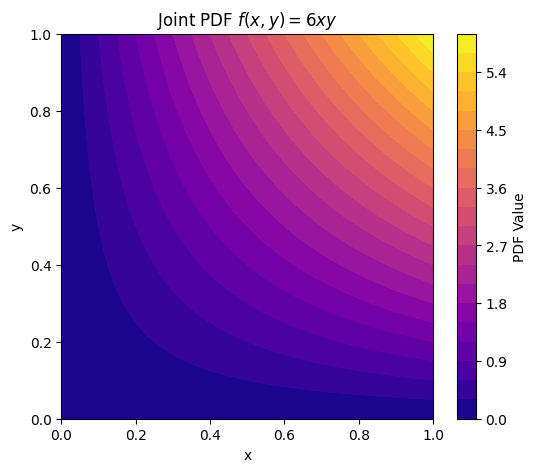

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Joint PDF definition: f(x, y) = 6xy, on [0, 1] x [0, 1]
def joint_pdf(x, y):
    return 6 * x * y

# 2D visualization
xg = np.linspace(0, 1, 100)
yg = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xg, yg)
Z = joint_pdf(X, Y)

plt.figure(figsize=(6,5))
cp = plt.contourf(X, Y, Z, levels=20, cmap='plasma')
plt.colorbar(cp, label='PDF Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Joint PDF $f(x, y) = 6xy$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


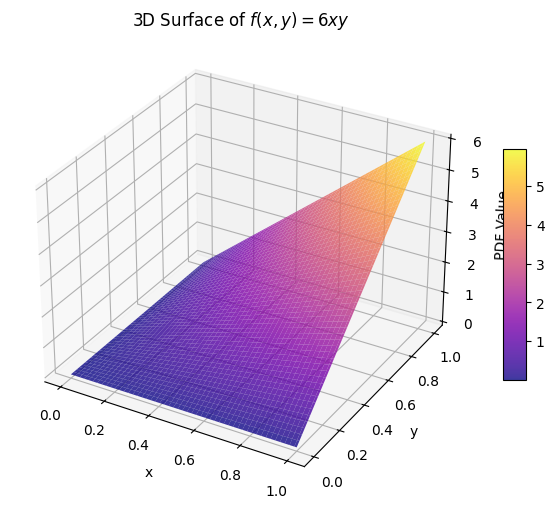

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# 3D Surface
surf = ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF Value')
ax.set_title(r'3D Surface of $f(x, y) = 6xy$')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()


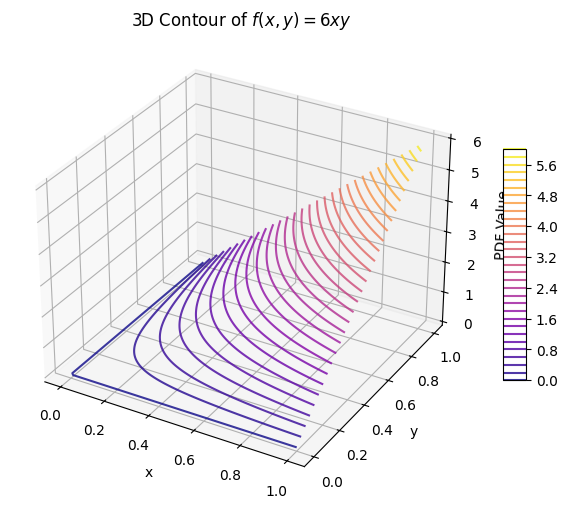

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def joint_pdf(x, y):
    return 6 * x * y

xg = np.linspace(0, 1, 100)
yg = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xg, yg)
Z = joint_pdf(X, Y)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# 3D 등고선 (contour)
contour = ax.contour3D(X, Y, Z, levels=30, cmap='plasma', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF Value')
ax.set_title(r'3D Contour of $f(x, y) = 6xy$')
fig.colorbar(contour, ax=ax, shrink=0.5, aspect=10)
plt.show()


## 예시: x+y < 1 영역의 확률 추정

$$ P(x+y < 1) = \int_{0}^{1} \int_{0}^{1-x} 6xy \, dy \, dx $$

In [ ]:
# 직접 적분해서 계산하기
import sympy

x, y = sympy.symbols('x y')
integral = sympy.integrate(6*x*y, (y, 0, 0.5-x), (x, 0, 1))
print(f"The exact value of the integral is: {integral}")

The exact value of the integral is: 0.125000000000000


In [ ]:
def joint_pdf(x, y):
    return 6 * x * y

# Monte Carlo sampling
N = 2000
x_samples = np.random.uniform(0, 1, N)
y_samples = np.random.uniform(0, 1, N)
pdf_vals = joint_pdf(x_samples, y_samples)
print(pdf_vals[:10])

[1.90567136 1.29099743 1.08555131 1.42764416 2.62306472 3.86616808
 0.97796121 0.13844902 0.48726318 0.86787955]


In [ ]:
# 예시: x+y < 1 영역의 확률 추정
mask = (x_samples + y_samples < 0.5)
print(mask[:10])

[False False False False False False False  True False False]


In [ ]:
prob_estimate = np.mean(pdf_vals[mask]) # 주어진 pdf 6*x*y에 대한 probability estimate.
print(f"P(x+y < 1) ≈ {prob_estimate:.4f}")

P(x+y < 1) ≈ 0.1301
